In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from netCDF4 import Dataset as ncfile

import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [7]:
import os
rootdir = './test1/'  #nc文件目录，注意里面只能有nc文件
list = os.listdir(rootdir)   #把所有文件的名字读入到list里
nc = ncfile(rootdir+list[0])
temp = nc.variables['ts'][0,1,:,:]
for i in range(1,len(list)):  #循环读取文件,这里从第2个文件开始了
    nc = ncfile(rootdir+list[i])
    temp = temp + nc.variables['ts'][0,1,:,:]
temp = temp/len(list) #将所有读取到的文件平均了

Text(0.5, 1.03, 'Temperature in degrees Celsius')

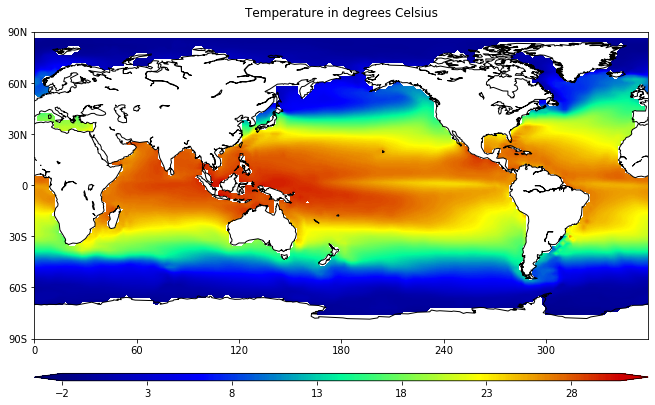

In [8]:
#add cyclic and shift grid - not needed in this case
#temp, lons = addcyclic(temp, lons)
#temp, lons = shiftgrid(-180, temp, lons)

plt.figure(figsize=(11, 8))
plt.tick_params(direction='out', which='both')

#set up map
mymap = Basemap(projection='cyl',llcrnrlon=0, urcrnrlon=360, \
                llcrnrlat=-90, urcrnrlat=90, \
                lon_0=0, lat_0=0, resolution='c')  

x,y=mymap(*np.meshgrid(lons, lats))

rvb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["navy","blue","mediumspringgreen","yellow","#CD0000"])

#contour data
clevs=np.arange(-2,31,0.1) #levels
cs = mymap.contourf(x,y,temp,clevs,extend='both',cmap=rvb)
clevs1=np.arange(-2,31,5) #levels
plt.colorbar(orientation='horizontal', aspect=75, pad=0.08, ticks=clevs1)
#cs = mymap.contour(x,y,temp,clevs,colors='k')
#plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=11) 

#axes
plt.xticks(np.arange(0, 360, 60), ['0', '60', '120', '180', '240', '300', '360'])
plt.yticks(np.arange(-90, 120, 30), ['90S', '60S', '30S', '0', '30N', '60N', '90N'])


#coastlines and title
mymap.drawcoastlines()
plt.title('Temperature in degrees Celsius', y=1.03)

#plt.savefig('ex1.png')

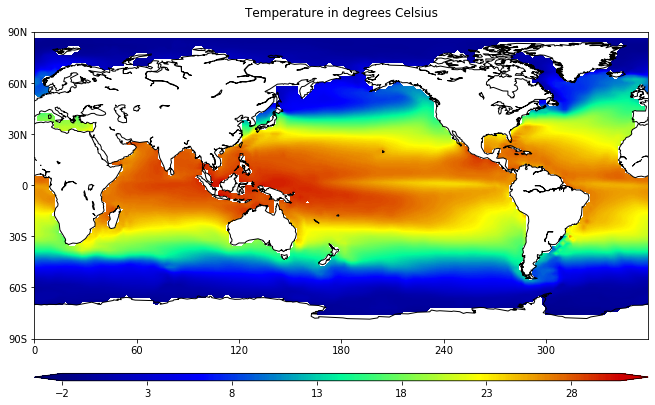

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
import numpy as np
from netCDF4 import Dataset as ncfile
import os
rootdir = './test1/'  #nc文件目录，注意里面只能有nc文件
list = os.listdir(rootdir)   #把所有文件的名字读入到list里
nc = ncfile(rootdir+list[0])
temp = nc.variables['ts'][0,1,:,:]
lons=nc.variables['lon'][:]
lats=nc.variables['lat'][:]
for i in range(1,len(list)):  #循环读取文件,这里从第2个文件开始了
    nc = ncfile(rootdir+list[i])
    temp = temp + nc.variables['ts'][0,1,:,:]
temp = temp/len(list) #将所有读取到的文件平均了
#add cyclic and shift grid - not needed in this case
#temp, lons = addcyclic(temp, lons)
#temp, lons = shiftgrid(-180, temp, lons)
plt.figure(figsize=(11, 8))
plt.tick_params(direction='out', which='both')
#set up map
mymap = Basemap(projection='cyl',llcrnrlon=0, urcrnrlon=360, \
                llcrnrlat=-90, urcrnrlat=90, \
                lon_0=0, lat_0=0, resolution='c')

x,y=mymap(*np.meshgrid(lons, lats))

rvb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["navy","blue","mediumspringgreen","yellow","#CD0000"])

#contour data
clevs=np.arange(-2,31,0.1) #levels
cs = mymap.contourf(x,y,temp,clevs,extend='both',cmap=rvb)
clevs1=np.arange(-2,31,5) #levels
plt.colorbar(orientation='horizontal', aspect=75, pad=0.08, ticks=clevs1)
#cs = mymap.contour(x,y,temp,clevs,colors='k')
#plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=11)

#axes
plt.xticks(np.arange(0, 360, 60), ['0', '60', '120', '180', '240', '300', '360'])
plt.yticks(np.arange(-90, 120, 30), ['90S', '60S', '30S', '0', '30N', '60N', '90N'])


#coastlines and title
mymap.drawcoastlines()
plt.title('Temperature in degrees Celsius', y=1.03)

plt.show()